# SORU 1 - ANOMALİ TESPİTİ (Z SKOR)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dosya_yolu = 'hackathon.xlsx'
excel_veri = pd.ExcelFile(dosya_yolu)

veri = pd.read_excel(dosya_yolu, sheet_name='Sheet1')

# Bölüm 2: Zaman Damgasından Bilgileri Çıkarın
# Zaman damgasından hafta içi/sonu, saat ve dakika bilgilerini çıkar
veri['TIME_STAMP'] = pd.to_datetime(veri['TIME_STAMP'])
veri['HAFTA_GUNU'] = veri['TIME_STAMP'].dt.dayofweek  # Pazartesi=0, Pazar=6
veri['SAAT'] = veri['TIME_STAMP'].dt.hour
veri['DAKIKA'] = veri['TIME_STAMP'].dt.minute

# 2023 ve 2024 resmi tatil günleri
resmi_tatil_2023 = [
    '2023-01-01', '2023-04-20', '2023-04-21', '2023-04-22', '2023-04-23',
    '2023-05-01', '2023-05-19', '2023-06-27', '2023-06-28', '2023-06-29',
    '2023-06-30', '2023-07-01', '2023-07-15', '2023-08-30', '2023-10-28',
    '2023-10-29', '2023-12-31'
]

resmi_tatil_2024 = [
    '2024-01-01', '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12',
    '2024-04-23', '2024-05-01', '2024-05-19', '2024-06-15', '2024-06-16',
    '2024-06-17', '2024-06-18', '2024-06-19', '2024-07-15', '2024-08-30',
    '2024-10-28', '2024-10-29', '2024-12-31'
]

resmi_tatil_gunleri = pd.to_datetime(resmi_tatil_2023 + resmi_tatil_2024)

# Hafta içi/Hafta sonu bilgisi ekler
veri['HAFTA_SONU'] = veri['HAFTA_GUNU'] >= 5  # Cumartesi ve Pazar

# Resmi tatil bilgisi ekler
veri['RESMI_TATIL'] = veri['TIME_STAMP'].dt.date.isin(resmi_tatil_gunleri.date)

veri.head()





,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD,HAFTA_GUNU,SAAT,DAKIKA,HAFTA_SONU,RESMI_TATIL
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.700,1,18,25,False,False
1,2024-03-05 18:20:00,10.0.901.xx Server 1,19703.467,525.575,1,18,20,False,False
2,2024-03-05 18:15:00,10.0.901.xx Server 1,26349.663,631.144,1,18,15,False,False
3,2024-03-05 18:10:00,10.0.901.xx Server 1,26068.494,623.673,1,18,10,False,False
4,2024-03-05 18:05:00,10.0.901.xx Server 1,25814.357,620.701,1,18,5,False,False


In [22]:

# Her kombinasyon için ortalama ve standart sapma hesaplayalım (resmi tatil ve hafta sonu dahil)
grup_istatistikleri = veri.groupby(['HAFTA_GUNU', 'SAAT', 'DAKIKA', 'HAFTA_SONU', 'RESMI_TATIL']).agg({
    'DOWNLOAD': ['mean', 'std'],
    'UPLOAD': ['mean', 'std']
}).reset_index()

# Çoklu indeks sütunlarını düzleştirin
grup_istatistikleri.columns = [
    'HAFTA_GUNU', 'SAAT', 'DAKIKA', 'HAFTA_SONU', 'RESMI_TATIL', 
    'DOWNLOAD_ORT', 'DOWNLOAD_STD', 'UPLOAD_ORT', 'UPLOAD_STD'
]

grup_istatistikleri.head()

,HAFTA_GUNU,SAAT,DAKIKA,HAFTA_SONU,RESMI_TATIL,DOWNLOAD_ORT,DOWNLOAD_STD,UPLOAD_ORT,UPLOAD_STD
0,0,0,0,False,False,37437.792687,1027.306373,947.326250,21.833429
1,0,0,0,False,True,29225.862000,NaN,1255.219000,NaN
2,0,0,5,False,False,37119.071312,1022.239046,929.292438,24.830581
3,0,0,5,False,True,36228.341000,NaN,1400.713000,NaN
4,0,0,15,False,False,33214.307941,7650.623900,829.798235,189.813840


In [23]:

# Bölüm 5: İstatistikleri Birleştirin ve Z-Skorlarını Hesaplayın
# İstatistikleri orijinal veriyle birleştirin
veri = veri.merge(grup_istatistikleri, on=['HAFTA_GUNU', 'SAAT', 'DAKIKA', 'HAFTA_SONU', 'RESMI_TATIL'])
# scaler = StandardScaler()
# veri[['DOWNLOAD', 'UPLOAD']] = scaler.fit_transform(veri[['DOWNLOAD', 'UPLOAD']])
# DOWNLOAD ve UPLOAD için Z-skorları hesaplayın
veri['DOWNLOAD_Z'] = (veri['DOWNLOAD'] - veri['DOWNLOAD_ORT']) / veri['DOWNLOAD_STD']
veri['UPLOAD_Z'] = (veri['UPLOAD'] - veri['UPLOAD_ORT']) / veri['UPLOAD_STD']

veri.head()

,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD,HAFTA_GUNU,SAAT,DAKIKA,HAFTA_SONU,RESMI_TATIL,DOWNLOAD_ORT,DOWNLOAD_STD,UPLOAD_ORT,UPLOAD_STD,DOWNLOAD_Z,UPLOAD_Z
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.700,1,18,25,False,False,23066.016222,2979.010241,594.120833,53.741617,-3.739161,-3.152507
1,2024-03-05 18:20:00,10.0.901.xx Server 1,19703.467,525.575,1,18,20,False,False,23245.569778,1359.478154,592.867611,35.313982,-2.605487,-1.905551
2,2024-03-05 18:15:00,10.0.901.xx Server 1,26349.663,631.144,1,18,15,False,False,23383.120333,1250.592487,593.551722,28.770717,2.372110,1.306616
3,2024-03-05 18:10:00,10.0.901.xx Server 1,26068.494,623.673,1,18,10,False,False,23132.769444,1264.793785,586.667833,27.105674,2.321109,1.365218
4,2024-03-05 18:05:00,10.0.901.xx Server 1,25814.357,620.701,1,18,5,False,False,22885.924222,1281.736886,581.104556,26.176589,2.284738,1.512666


In [24]:

# Bölüm 6: Anomalileri Belirleyin
# Anomali tespiti için eşik değeri tanımlayın
z_skor_esik = 3  # Genellikle, Z-skoru > 3 veya < -3 anomali olarak kabul edilir

# Anomalileri belirleyin
veri['DOWNLOAD_ANOMALI'] = veri['DOWNLOAD_Z'].abs() > z_skor_esik
veri['UPLOAD_ANOMALI'] = veri['UPLOAD_Z'].abs() > z_skor_esik

# Anomali olarak belirlenen satırları gösterin
anomali_verileri = veri[(veri['DOWNLOAD_ANOMALI']) | (veri['UPLOAD_ANOMALI'])]

# İlk birkaç satırı görüntüleyerek anomali verilerini kontrol edin
anomali_verileri.head()


,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD,HAFTA_GUNU,SAAT,DAKIKA,HAFTA_SONU,RESMI_TATIL,DOWNLOAD_ORT,DOWNLOAD_STD,UPLOAD_ORT,UPLOAD_STD,DOWNLOAD_Z,UPLOAD_Z,DOWNLOAD_ANOMALI,UPLOAD_ANOMALI
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.700,1,18,25,False,False,23066.016222,2979.010241,594.120833,53.741617,-3.739161,-3.152507,True,True
498,2024-03-04 00:30:00,10.0.901.xx Server 1,22027.496,488.285,0,0,30,False,False,31407.073882,2973.063577,778.752647,79.612240,-3.154853,-3.648530,True,True
499,2024-03-04 00:25:00,10.0.901.xx Server 1,23873.519,529.597,0,0,25,False,False,32722.975471,2764.632203,808.250824,75.617982,-3.200953,-3.685021,True,True
500,2024-03-04 00:20:00,10.0.901.xx Server 1,21621.785,476.400,0,0,20,False,False,33509.038000,3443.961220,831.613941,94.458527,-3.451622,-3.760528,True,True
501,2024-03-04 00:15:00,10.0.901.xx Server 1,4164.675,97.465,0,0,15,False,False,33214.307941,7650.623900,829.798235,189.813840,-3.797028,-3.858166,True,True


In [14]:
anomali_verileri

,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD,HAFTA_GUNU,SAAT,DAKIKA,HAFTA_SONU,RESMI_TATIL,DOWNLOAD_ORT,DOWNLOAD_STD,UPLOAD_ORT,UPLOAD_STD,DOWNLOAD_Z,UPLOAD_Z,DOWNLOAD_ANOMALI,UPLOAD_ANOMALI
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.700,1,18,25,False,False,23066.016222,2979.010241,594.120833,53.741617,-3.739161,-3.152507,True,True
498,2024-03-04 00:30:00,10.0.901.xx Server 1,22027.496,488.285,0,0,30,False,False,31407.073882,2973.063577,778.752647,79.612240,-3.154853,-3.648530,True,True
499,2024-03-04 00:25:00,10.0.901.xx Server 1,23873.519,529.597,0,0,25,False,False,32722.975471,2764.632203,808.250824,75.617982,-3.200953,-3.685021,True,True
500,2024-03-04 00:20:00,10.0.901.xx Server 1,21621.785,476.400,0,0,20,False,False,33509.038000,3443.961220,831.613941,94.458527,-3.451622,-3.760528,True,True
501,2024-03-04 00:15:00,10.0.901.xx Server 1,4164.675,97.465,0,0,15,False,False,33214.307941,7650.623900,829.798235,189.813840,-3.797028,-3.858166,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35265,2023-11-02 23:50:00,10.0.901.xx Server 1,32312.908,803.128,3,23,50,False,False,36214.726889,1956.295145,905.923667,32.264790,-1.994494,-3.186001,False,True
35346,2023-11-02 17:05:00,10.0.901.xx Server 1,14496.708,417.229,3,17,5,False,False,21284.244667,1969.022607,536.814500,33.766580,-3.447160,-3.541534,True,True
35347,2023-11-02 17:00:00,10.0.901.xx Server 1,13480.711,414.516,3,17,0,False,False,20902.416556,2082.448821,531.239056,32.994795,-3.563932,-3.537620,True,True
35348,2023-11-02 16:55:00,10.0.901.xx Server 1,15010.705,444.240,3,16,55,False,False,20876.273444,1714.403176,528.923167,25.164432,-3.421347,-3.365193,True,True


In [25]:

# Bölüm 7: Belirli Bir Veri Noktasını Kontrol Edin
# Kontrol edilecek belirli veri noktası (resmi tatil ve hafta sonu bilgisiyle)
belirli_veri_noktasi = {
    'TIME_STAMP': '2024-03-05 18:25:00',
    'SERVER_NAME': '10.0.901.xx Server 1',
    'DOWNLOAD': 11927.0173,
    'UPLOAD': 424.7
}

# Tutarlılık için DataFrame'e dönüştürün
belirli_df = pd.DataFrame([belirli_veri_noktasi])
belirli_df['TIME_STAMP'] = pd.to_datetime(belirli_df['TIME_STAMP'])
belirli_df['HAFTA_GUNU'] = belirli_df['TIME_STAMP'].dt.dayofweek
belirli_df['SAAT'] = belirli_df['TIME_STAMP'].dt.hour
belirli_df['DAKIKA'] = belirli_df['TIME_STAMP'].dt.minute
belirli_df['HAFTA_SONU'] = belirli_df['HAFTA_GUNU'] >= 5  # Cumartesi ve Pazar
belirli_df['RESMI_TATIL'] = belirli_df['TIME_STAMP'].dt.date.isin(resmi_tatil_gunleri.date)

# İstatistikleri birleştirin
belirli_df = belirli_df.merge(grup_istatistikleri, on=['HAFTA_GUNU', 'SAAT', 'DAKIKA', 'HAFTA_SONU', 'RESMI_TATIL'], how='left')

# DOWNLOAD ve UPLOAD için Z-skorlarını hesaplayın
belirli_df['DOWNLOAD_Z'] = (belirli_df['DOWNLOAD'] - belirli_df['DOWNLOAD_ORT']) / belirli_df['DOWNLOAD_STD']
belirli_df['UPLOAD_Z'] = (belirli_df['UPLOAD'] - belirli_df['UPLOAD_ORT']) / belirli_df['UPLOAD_STD']

# Anomali olup olmadığını kontrol edin
belirli_df['DOWNLOAD_ANOMALI'] = belirli_df['DOWNLOAD_Z'].abs() > z_skor_esik
belirli_df['UPLOAD_ANOMALI'] = belirli_df['UPLOAD_Z'].abs() > z_skor_esik

# Belirli veri noktasının anomali olup olmadığını görüntüleyin
belirli_df[['TIME_STAMP', 'SERVER_NAME', 'DOWNLOAD', 'UPLOAD', 'DOWNLOAD_ANOMALI', 'UPLOAD_ANOMALI']]

,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD,DOWNLOAD_ANOMALI,UPLOAD_ANOMALI
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.0173,424.7,True,True


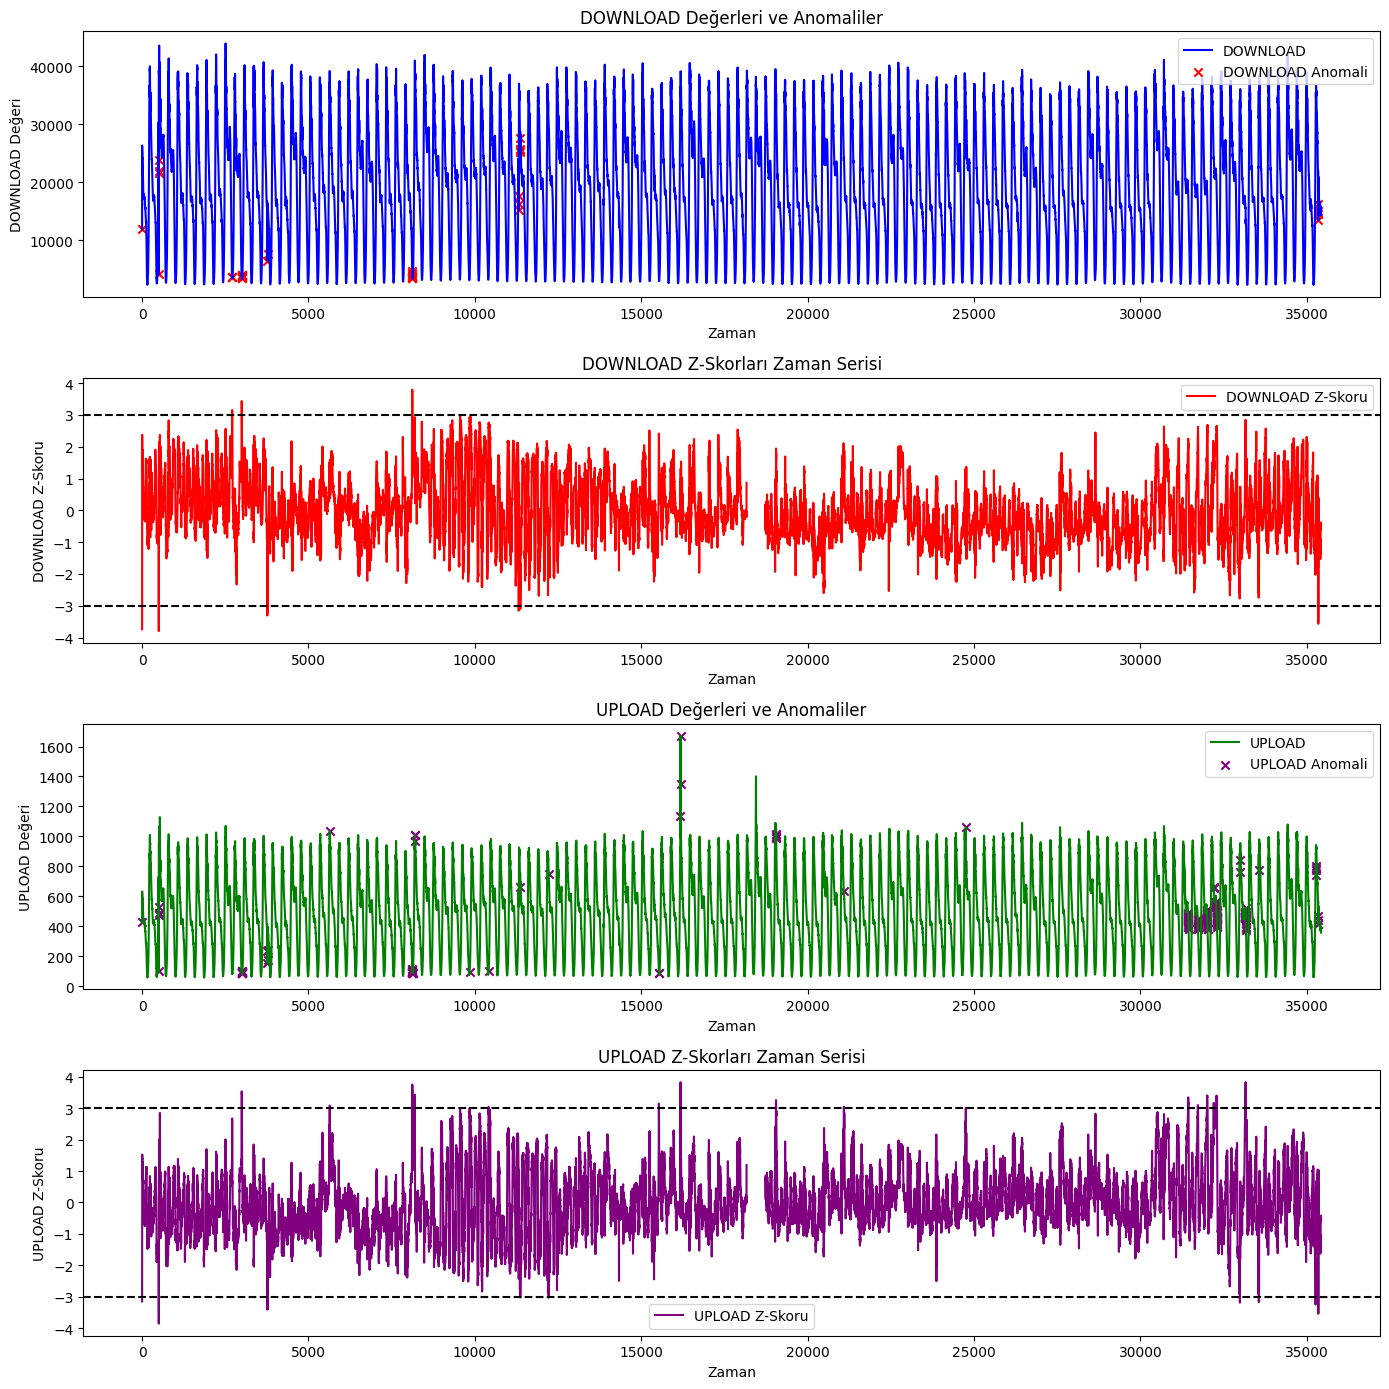

In [26]:

# DOWNLOAD ve UPLOAD değerlerinin ve anomalilerinin ayrı ayrı görselleştirilmesi
plt.figure(figsize=(14, 14))

# DOWNLOAD değerleri için zaman serisi grafiği
plt.subplot(4, 1, 1)
plt.plot(veri.index, veri['DOWNLOAD'], label='DOWNLOAD', color='blue')
plt.scatter(veri.index[veri['DOWNLOAD_ANOMALI']], veri['DOWNLOAD'][veri['DOWNLOAD_ANOMALI']], color='red', marker='x', label='DOWNLOAD Anomali')
plt.title('DOWNLOAD Değerleri ve Anomaliler')
plt.xlabel('Zaman')
plt.ylabel('DOWNLOAD Değeri')
plt.legend()

# DOWNLOAD Z-skorları için zaman serisi grafiği
plt.subplot(4, 1, 2)
plt.plot(veri.index, veri['DOWNLOAD_Z'], label='DOWNLOAD Z-Skoru', color='red')
plt.axhline(y=3, color='black', linestyle='--')
plt.axhline(y=-3, color='black', linestyle='--')
plt.title('DOWNLOAD Z-Skorları Zaman Serisi')
plt.xlabel('Zaman')
plt.ylabel('DOWNLOAD Z-Skoru')
plt.legend()

# UPLOAD değerleri için zaman serisi grafiği
plt.subplot(4, 1, 3)
plt.plot(veri.index, veri['UPLOAD'], label='UPLOAD', color='green')
plt.scatter(veri.index[veri['UPLOAD_ANOMALI']], veri['UPLOAD'][veri['UPLOAD_ANOMALI']], color='purple', marker='x', label='UPLOAD Anomali')
plt.title('UPLOAD Değerleri ve Anomaliler')
plt.xlabel('Zaman')
plt.ylabel('UPLOAD Değeri')
plt.legend()

# UPLOAD Z-skorları için zaman serisi grafiği
plt.subplot(4, 1, 4)
plt.plot(veri.index, veri['UPLOAD_Z'], label='UPLOAD Z-Skoru', color='purple')
plt.axhline(y=3, color='black', linestyle='--')
plt.axhline(y=-3, color='black', linestyle='--')
plt.title('UPLOAD Z-Skorları Zaman Serisi')
plt.xlabel('Zaman')
plt.ylabel('UPLOAD Z-Skoru')
plt.legend()

plt.tight_layout()
plt.show()



# SORU 1 - HAFTASONU DAHİL DEĞİL 

           TIME_STAMP           SERVER_NAME  DOWNLOAD  UPLOAD  \
0 2024-03-05 18:25:00  10.0.901.xx Server 1  927.0173   424.7   

   DOWNLOAD_ANOMALI  UPLOAD_ANOMALI  
0              True            True  


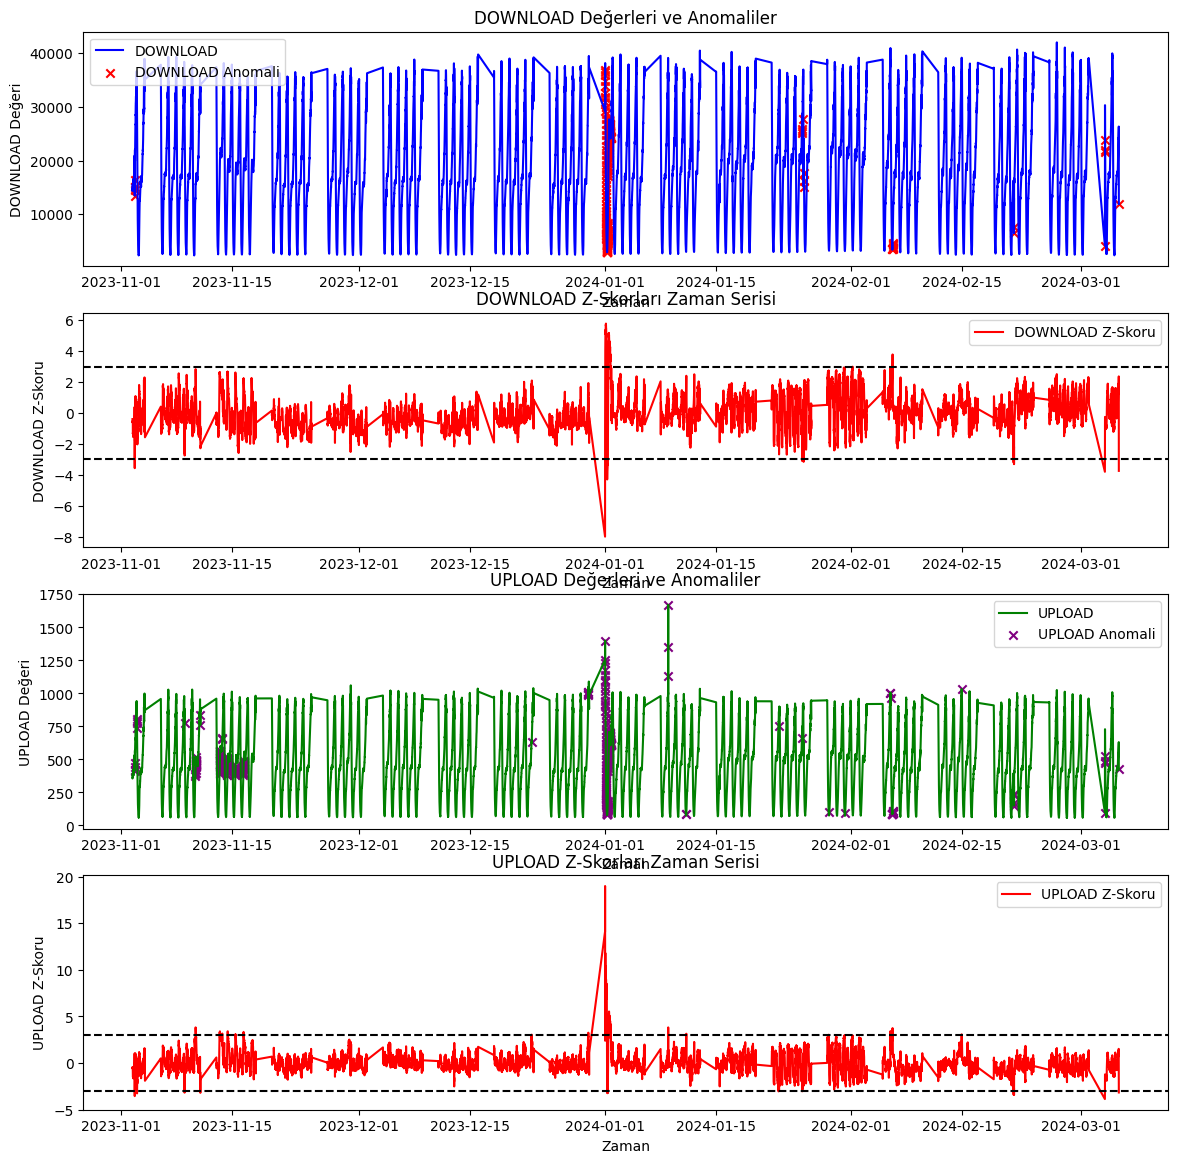

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Veriyi yükleme
dosya_yolu = 'hackathon.xlsx'
veri = pd.read_excel(dosya_yolu, sheet_name='Sheet1')

# Zaman Damgasından Bilgileri Çıkarın
veri['TIME_STAMP'] = pd.to_datetime(veri['TIME_STAMP'])
veri['HAFTA_GUNU'] = veri['TIME_STAMP'].dt.dayofweek  # Pazartesi=0, Pazar=6
veri['SAAT'] = veri['TIME_STAMP'].dt.hour
veri['DAKIKA'] = veri['TIME_STAMP'].dt.minute

# 2023 ve 2024 resmi tatil günleri
resmi_tatil_2023 = [
    '2023-01-01', '2023-04-20', '2023-04-21', '2023-04-22', '2023-04-23',
    '2023-05-01', '2023-05-19', '2023-06-27', '2023-06-28', '2023-06-29',
    '2023-06-30', '2023-07-01', '2023-07-15', '2023-08-30', '2023-10-28',
    '2023-10-29', '2023-12-31'
]

resmi_tatil_2024 = [
    '2024-01-01', '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12',
    '2024-04-23', '2024-05-01', '2024-05-19', '2024-06-15', '2024-06-16',
    '2024-06-17', '2024-06-18', '2024-06-19', '2024-07-15', '2024-08-30',
    '2024-10-28', '2024-10-29', '2024-12-31'
]

resmi_tatil_gunleri = pd.to_datetime(resmi_tatil_2023 + resmi_tatil_2024)

# Hafta içi/Hafta sonu bilgisi ekler
veri['HAFTA_SONU'] = veri['HAFTA_GUNU'] >= 5  # Cumartesi ve Pazar

# Resmi tatil bilgisi ekler
veri['RESMI_TATIL'] = veri['TIME_STAMP'].dt.date.isin(resmi_tatil_gunleri.date)

# Hafta sonu ve resmi tatil verilerini çıkarın
veri_calismasi = veri[~veri['HAFTA_SONU'] & ~veri['RESMI_TATIL']]

# Her kombinasyon için ortalama ve standart sapma hesaplayalım
grup_istatistikleri = veri_calismasi.groupby(['HAFTA_GUNU', 'SAAT', 'DAKIKA']).agg({
    'DOWNLOAD': ['mean', 'std'],
    'UPLOAD': ['mean', 'std']
}).reset_index()

# Çoklu indeks sütunlarını düzleştirin
grup_istatistikleri.columns = [
    'HAFTA_GUNU', 'SAAT', 'DAKIKA', 
    'DOWNLOAD_ORT', 'DOWNLOAD_STD', 'UPLOAD_ORT', 'UPLOAD_STD'
]

# İstatistikleri orijinal veriyle birleştirin
veri = veri.merge(grup_istatistikleri, on=['HAFTA_GUNU', 'SAAT', 'DAKIKA'])

# DOWNLOAD ve UPLOAD için Z-skorlarını hesaplayın
veri['DOWNLOAD_Z'] = (veri['DOWNLOAD'] - veri['DOWNLOAD_ORT']) / veri['DOWNLOAD_STD']
veri['UPLOAD_Z'] = (veri['UPLOAD'] - veri['UPLOAD_ORT']) / veri['UPLOAD_STD']

# Anomali tespiti için eşik değeri tanımlayın
z_skor_esik = 3  # Genellikle, Z-skoru > 3 veya < -3 anomali olarak kabul edilir

# Anomalileri belirleyin
veri['DOWNLOAD_ANOMALI'] = veri['DOWNLOAD_Z'].abs() > z_skor_esik
veri['UPLOAD_ANOMALI'] = veri['UPLOAD_Z'].abs() > z_skor_esik

# Belirli bir veri noktasını kontrol edin
belirli_veri_noktasi = {
    'TIME_STAMP': '2024-03-05 18:25:00',
    'SERVER_NAME': '10.0.901.xx Server 1',
    'DOWNLOAD': 927.0173,
    'UPLOAD': 424.7
}

# Tutarlılık için DataFrame'e dönüştürün
belirli_df = pd.DataFrame([belirli_veri_noktasi])
belirli_df['TIME_STAMP'] = pd.to_datetime(belirli_df['TIME_STAMP'])
belirli_df['HAFTA_GUNU'] = belirli_df['TIME_STAMP'].dt.dayofweek
belirli_df['SAAT'] = belirli_df['TIME_STAMP'].dt.hour
belirli_df['DAKIKA'] = belirli_df['TIME_STAMP'].dt.minute
belirli_df['HAFTA_SONU'] = belirli_df['HAFTA_GUNU'] >= 5  # Cumartesi ve Pazar
belirli_df['RESMI_TATIL'] = belirli_df['TIME_STAMP'].dt.date.isin(resmi_tatil_gunleri.date)

# Belirli veri noktasının hafta sonu veya resmi tatil olmadığını doğrulayın
assert not belirli_df['HAFTA_SONU'].iloc[0], "Belirtilen veri noktası hafta sonudur."
assert not belirli_df['RESMI_TATIL'].iloc[0], "Belirtilen veri noktası resmi tatildir."

# İstatistikleri birleştirin
belirli_df = belirli_df.merge(grup_istatistikleri, on=['HAFTA_GUNU', 'SAAT', 'DAKIKA'], how='left')

# DOWNLOAD ve UPLOAD için Z-skorlarını hesaplayın
belirli_df['DOWNLOAD_Z'] = (belirli_df['DOWNLOAD'] - belirli_df['DOWNLOAD_ORT']) / belirli_df['DOWNLOAD_STD']
belirli_df['UPLOAD_Z'] = (belirli_df['UPLOAD'] - belirli_df['UPLOAD_ORT']) / belirli_df['UPLOAD_STD']

# Anomali olup olmadığını kontrol edin
z_skor_esik = 3  # Genellikle, Z-skoru > 3 veya < -3 anomali olarak kabul edilir
belirli_df['DOWNLOAD_ANOMALI'] = belirli_df['DOWNLOAD_Z'].abs() > z_skor_esik
belirli_df['UPLOAD_ANOMALI'] = belirli_df['UPLOAD_Z'].abs() > z_skor_esik

# Belirli veri noktasının anomali olup olmadığını görüntüleyin
belirli_df_result = belirli_df[['TIME_STAMP', 'SERVER_NAME', 'DOWNLOAD', 'UPLOAD', 'DOWNLOAD_ANOMALI', 'UPLOAD_ANOMALI']]
print(belirli_df_result)

# DOWNLOAD ve UPLOAD değerlerinin ve anomalilerinin ayrı ayrı görselleştirilmesi
plt.figure(figsize=(14, 14))

# DOWNLOAD değerleri için zaman serisi grafiği
plt.subplot(4, 1, 1)
plt.plot(veri['TIME_STAMP'], veri['DOWNLOAD'], label='DOWNLOAD', color='blue')
plt.scatter(veri['TIME_STAMP'][veri['DOWNLOAD_ANOMALI']], veri['DOWNLOAD'][veri['DOWNLOAD_ANOMALI']], color='red', marker='x', label='DOWNLOAD Anomali')
plt.title('DOWNLOAD Değerleri ve Anomaliler')
plt.xlabel('Zaman')
plt.ylabel('DOWNLOAD Değeri')
plt.legend()

# DOWNLOAD Z-skorları için zaman serisi grafiği
plt.subplot(4, 1, 2)
plt.plot(veri['TIME_STAMP'], veri['DOWNLOAD_Z'], label='DOWNLOAD Z-Skoru', color='red')
plt.axhline(y=3, color='black', linestyle='--')
plt.axhline(y=-3, color='black', linestyle='--')
plt.title('DOWNLOAD Z-Skorları Zaman Serisi')
plt.xlabel('Zaman')
plt.ylabel('DOWNLOAD Z-Skoru')
plt.legend()

# UPLOAD değerleri için zaman serisi grafiği
plt.subplot(4, 1, 3)
plt.plot(veri['TIME_STAMP'], veri['UPLOAD'], label='UPLOAD', color='green')
plt.scatter(veri['TIME_STAMP'][veri['UPLOAD_ANOMALI']], veri['UPLOAD'][veri['UPLOAD_ANOMALI']], color='purple', marker='x', label='UPLOAD Anomali')
plt.title('UPLOAD Değerleri ve Anomaliler')
plt.xlabel('Zaman')
plt.ylabel('UPLOAD Değeri')
plt.legend()



# UPLOAD Z-skorları için zaman serisi grafiği
plt.subplot(4, 1, 4)
plt.plot(veri['TIME_STAMP'], veri['UPLOAD_Z'], label='UPLOAD Z-Skoru', color='red')
plt.axhline(y=3, color='black', linestyle='--')
plt.axhline(y=-3, color='black', linestyle='--')
plt.title('UPLOAD Z-Skorları Zaman Serisi')
plt.xlabel('Zaman')
plt.ylabel('UPLOAD Z-Skoru')
plt.legend()

# SORU 1 - KNN 

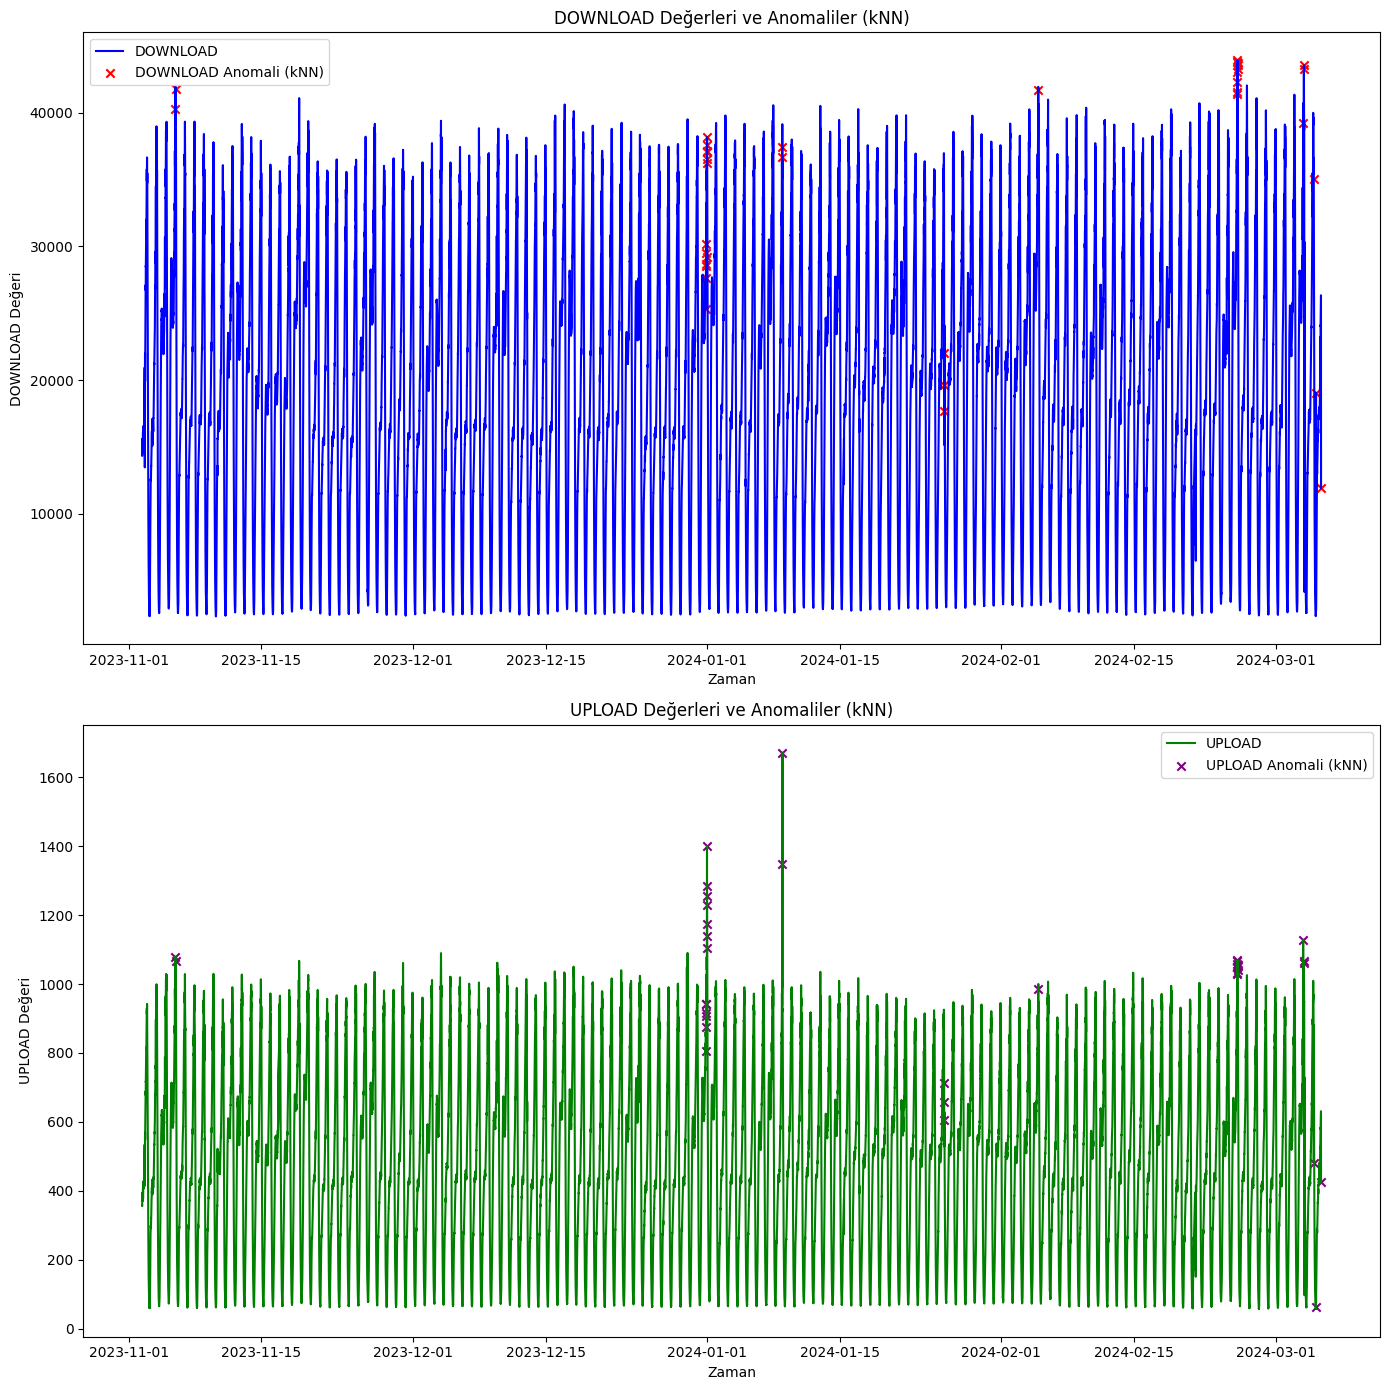

In [3]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Veriyi yükleme
file_path = 'hackathon.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Tarih-saat bilgilerini kullanarak hafta içi/hafta sonu, bayramlar, saat ve dakika bilgilerini ekleme
df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])
df['Weekday'] = df['TIME_STAMP'].dt.dayofweek
df['Hour'] = df['TIME_STAMP'].dt.hour
df['Minute'] = df['TIME_STAMP'].dt.minute

# Türkiye'deki resmi tatil günlerini tanımlama
resmi_tatil_2023 = pd.to_datetime([
    '2023-01-01', '2023-04-20', '2023-04-21', '2023-04-22', '2023-04-23',
    '2023-05-01', '2023-05-19', '2023-06-27', '2023-06-28', '2023-06-29',
    '2023-06-30', '2023-07-01', '2023-07-15', '2023-08-30', '2023-10-28',
    '2023-10-29', '2023-12-31'
])

resmi_tatil_2024 = pd.to_datetime([
    '2024-01-01', '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12',
    '2024-04-23', '2024-05-01', '2024-05-19', '2024-06-15', '2024-06-16',
    '2024-06-17', '2024-06-18', '2024-06-19', '2024-07-15', '2024-08-30',
    '2024-10-28', '2024-10-29', '2024-12-31'
])

# Tüm tatil günlerini birleştirme
resmi_tatiller = list(resmi_tatil_2023) + list(resmi_tatil_2024)

# Tatil günlerini işaretleme
df['Holiday'] = df['TIME_STAMP'].dt.normalize().isin(resmi_tatiller)

# Eksik değerleri kontrol edelim ve ortalama ile dolduralım
features = ['DOWNLOAD', 'UPLOAD', 'Weekday', 'Hour', 'Minute']
df[features] = df[features].fillna(df[features].mean())
df['Holiday'] = df['Holiday'].fillna(False)

# kNN modelini eğitme
knn_model = NearestNeighbors(n_neighbors=5)
knn_model.fit(df[features])

# Her veri noktası için en yakın 5 komşuya olan uzaklıkları hesaplama
distances, indices = knn_model.kneighbors(df[features])

# Ortalama uzaklıkları hesaplayalım
avg_distances = distances.mean(axis=1)

# Eşik değeri belirleyelim (örneğin, ortalama uzaklıkların 99.9. yüzdelik dilimi)
threshold = np.percentile(avg_distances, 99.9)

# Anomalileri tespit edelim
df['knn_anomaly'] = avg_distances > threshold

# Anomali olan gün ve saatleri tespit etme
knn_anomalies = df[df['knn_anomaly'] == True]

# Zaman serisi grafikleri
plt.figure(figsize=(14, 14))

# DOWNLOAD değerleri için zaman serisi grafiği
plt.subplot(2, 1, 1)
plt.plot(df['TIME_STAMP'], df['DOWNLOAD'], label='DOWNLOAD', color='blue')
plt.scatter(knn_anomalies['TIME_STAMP'], knn_anomalies['DOWNLOAD'], color='red', marker='x', label='DOWNLOAD Anomali (kNN)')
plt.title('DOWNLOAD Değerleri ve Anomaliler (kNN)')
plt.xlabel('Zaman')
plt.ylabel('DOWNLOAD Değeri')
plt.legend()

# UPLOAD değerleri için zaman serisi grafiği
plt.subplot(2, 1, 2)
plt.plot(df['TIME_STAMP'], df['UPLOAD'], label='UPLOAD', color='green')
plt.scatter(knn_anomalies['TIME_STAMP'], knn_anomalies['UPLOAD'], color='purple', marker='x', label='UPLOAD Anomali (kNN)')
plt.title('UPLOAD Değerleri ve Anomaliler (kNN)')
plt.xlabel('Zaman')
plt.ylabel('UPLOAD Değeri')
plt.legend()

plt.tight_layout()
plt.show()


# SORU 2 - FORECASTING - PROPHET

12:39:34 - cmdstanpy - INFO - Chain [1] start processing
12:39:45 - cmdstanpy - INFO - Chain [1] done processing
12:39:50 - cmdstanpy - INFO - Chain [1] start processing
12:40:04 - cmdstanpy - INFO - Chain [1] done processing


           TIME_STAMP           SERVER_NAME   DOWNLOAD  UPLOAD  \
0 2024-03-05 18:25:00  10.0.901.xx Server 1  11927.017   424.7   

   anomaly_download  anomaly_upload  
0              True            True  


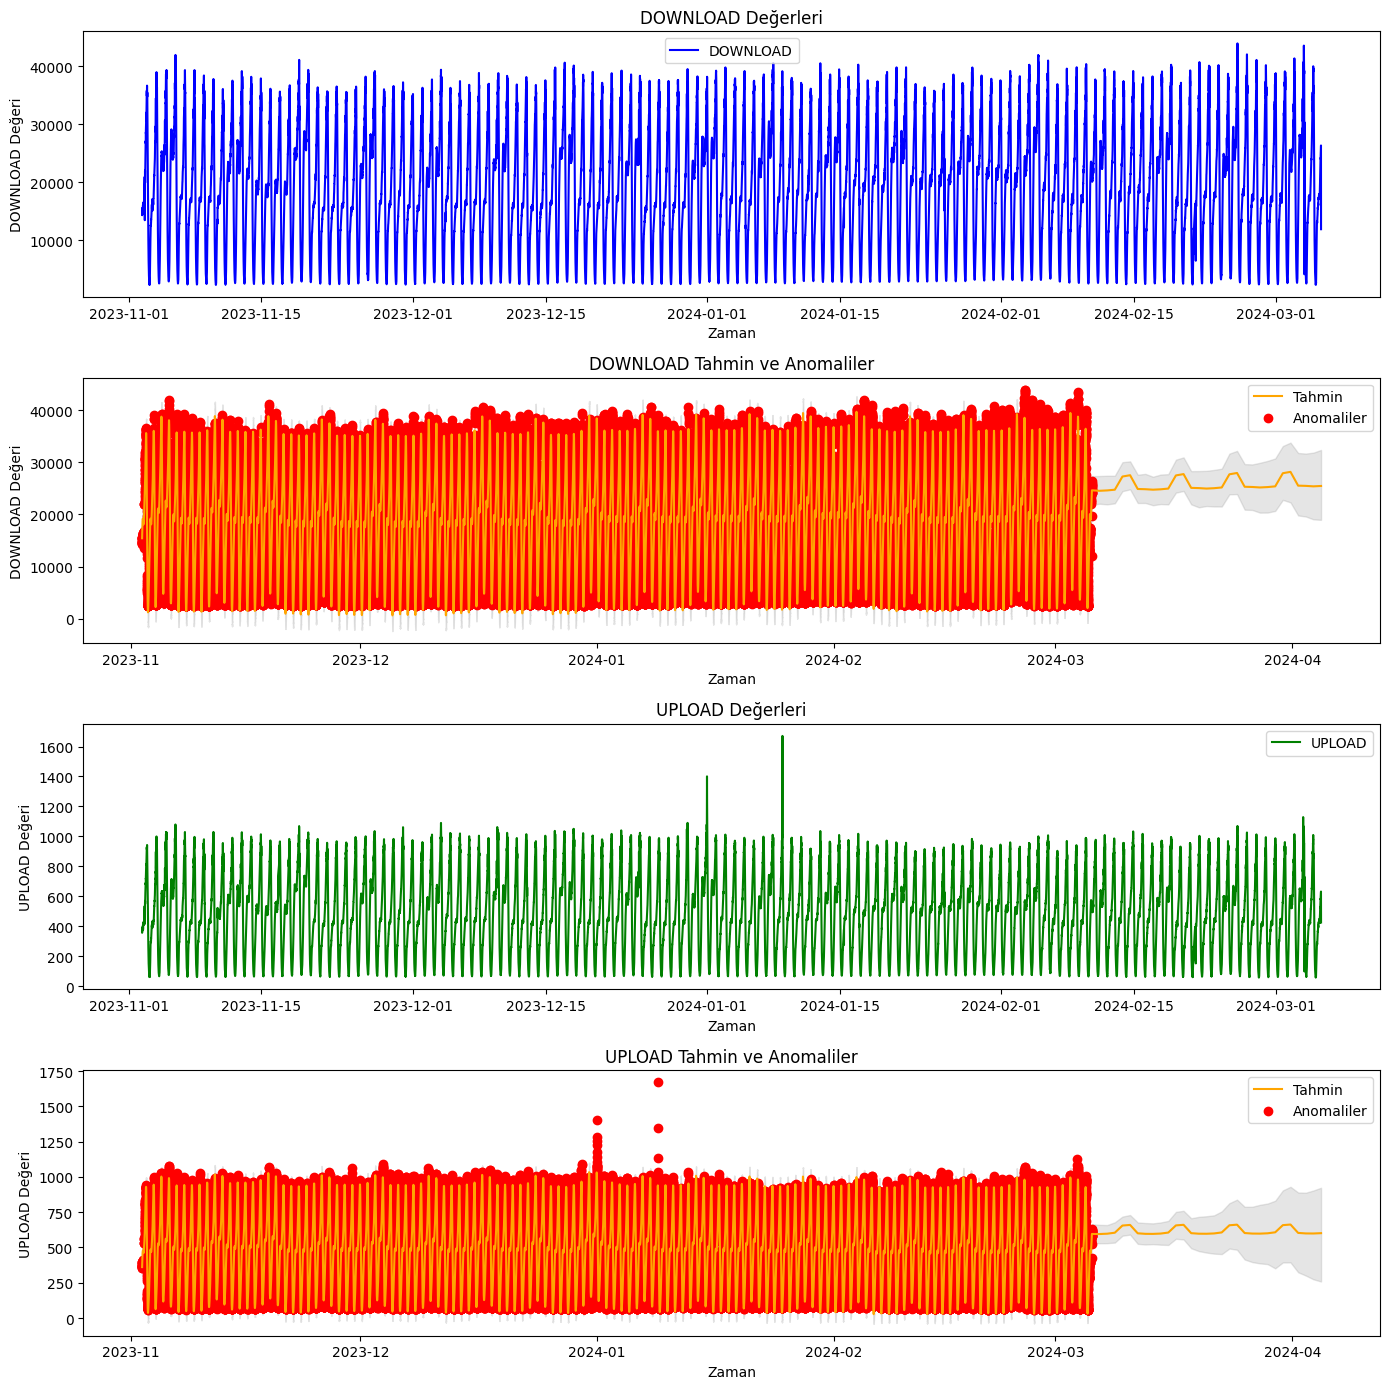

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Veriyi yükleme
dosya_yolu = 'hackathon.xlsx'
veri = pd.read_excel(dosya_yolu, sheet_name='Sheet1')

# Zaman Damgasından Bilgileri Çıkarın
veri['TIME_STAMP'] = pd.to_datetime(veri['TIME_STAMP'])

# Prophet modeline uygun formatta veri hazırlama (DOWNLOAD için)
df_prophet_download = pd.DataFrame()
df_prophet_download['ds'] = veri['TIME_STAMP']
df_prophet_download['y'] = veri['DOWNLOAD']

# Prophet modelini tanımlama ve eğitme
model_download = Prophet()
model_download.fit(df_prophet_download)

# Tahmin yapmak için gelecekteki tarihleri oluşturma (30 gün)
future_download = model_download.make_future_dataframe(periods=30, freq='D')
forecast_download = model_download.predict(future_download)

# Prophet modeline uygun formatta veri hazırlama (UPLOAD için)
df_prophet_upload = pd.DataFrame()
df_prophet_upload['ds'] = veri['TIME_STAMP']
df_prophet_upload['y'] = veri['UPLOAD']

# Prophet modelini tanımlama ve eğitme
model_upload = Prophet()
model_upload.fit(df_prophet_upload)

# Tahmin yapmak için gelecekteki tarihleri oluşturma (30 gün)
future_upload = model_upload.make_future_dataframe(periods=30, freq='D')
forecast_upload = model_upload.predict(future_upload)

# Anomali tespiti için tahmin edilen değerler ve gerçek değerler arasındaki farkı hesaplama
veri['yhat_download'] = forecast_download['yhat'].iloc[:len(veri)].values
veri['yhat_upper_download'] = forecast_download['yhat_upper'].iloc[:len(veri)].values
veri['yhat_lower_download'] = forecast_download['yhat_lower'].iloc[:len(veri)].values
veri['yhat_upload'] = forecast_upload['yhat'].iloc[:len(veri)].values
veri['yhat_upper_upload'] = forecast_upload['yhat_upper'].iloc[:len(veri)].values
veri['yhat_lower_upload'] = forecast_upload['yhat_lower'].iloc[:len(veri)].values

# DOWNLOAD ve UPLOAD anomalilerini belirleme
veri['anomaly_download'] = (veri['DOWNLOAD'] < veri['yhat_lower_download']) | (veri['DOWNLOAD'] > veri['yhat_upper_download'])
veri['anomaly_upload'] = (veri['UPLOAD'] < veri['yhat_lower_upload']) | (veri['UPLOAD'] > veri['yhat_upper_upload'])

# Belirli bir veri noktasını kontrol edin
belirli_veri_noktasi = {
    'TIME_STAMP': '2024-03-05 18:25:00',
    'SERVER_NAME': '10.0.901.xx Server 1',
    'DOWNLOAD': 11927.017,
    'UPLOAD': 424.7
}

belirli_df = pd.DataFrame([belirli_veri_noktasi])
belirli_df['TIME_STAMP'] = pd.to_datetime(belirli_df['TIME_STAMP'])

# Prophet tahminlerini belirli veri noktasına ekleyin
belirli_df = belirli_df.merge(veri[['TIME_STAMP', 'yhat_download', 'yhat_upper_download', 'yhat_lower_download', 'yhat_upload', 'yhat_upper_upload', 'yhat_lower_upload']], on='TIME_STAMP', how='left')

# DOWNLOAD ve UPLOAD anomalilerini kontrol edin
belirli_df['anomaly_download'] = (belirli_df['DOWNLOAD'] < belirli_df['yhat_lower_download']) | (belirli_df['DOWNLOAD'] > belirli_df['yhat_upper_download'])
belirli_df['anomaly_upload'] = (belirli_df['UPLOAD'] < belirli_df['yhat_lower_upload']) | (belirli_df['UPLOAD'] > belirli_df['yhat_upper_upload'])

# Belirli veri noktasının anomali olup olmadığını görüntüleyin
print(belirli_df[['TIME_STAMP', 'SERVER_NAME', 'DOWNLOAD', 'UPLOAD', 'anomaly_download', 'anomaly_upload']])

# Anomalileri görselleştirme
plt.figure(figsize=(14, 14))

# DOWNLOAD Değerleri ve Anomaliler
plt.subplot(4, 1, 1)
plt.plot(veri['TIME_STAMP'], veri['DOWNLOAD'], label='DOWNLOAD', color='blue')
plt.title('DOWNLOAD Değerleri')
plt.xlabel('Zaman')
plt.ylabel('DOWNLOAD Değeri')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(forecast_download['ds'], forecast_download['yhat'], label='Tahmin', color='orange')
plt.fill_between(forecast_download['ds'], forecast_download['yhat_lower'], forecast_download['yhat_upper'], color='gray', alpha=0.2)
plt.scatter(veri['TIME_STAMP'][veri['anomaly_download']], veri['DOWNLOAD'][veri['anomaly_download']], color='red', label='Anomaliler')
plt.title('DOWNLOAD Tahmin ve Anomaliler')
plt.xlabel('Zaman')
plt.ylabel('DOWNLOAD Değeri')
plt.legend()

# UPLOAD Değerleri ve Anomaliler
plt.subplot(4, 1, 3)
plt.plot(veri['TIME_STAMP'], veri['UPLOAD'], label='UPLOAD', color='green')
plt.title('UPLOAD Değerleri')
plt.xlabel('Zaman')
plt.ylabel('UPLOAD Değeri')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(forecast_upload['ds'], forecast_upload['yhat'], label='Tahmin', color='orange')
plt.fill_between(forecast_upload['ds'], forecast_upload['yhat_lower'], forecast_upload['yhat_upper'], color='gray', alpha=0.2)
plt.scatter(veri['TIME_STAMP'][veri['anomaly_upload']], veri['UPLOAD'][veri['anomaly_upload']], color='red', label='Anomaliler')
plt.title('UPLOAD Tahmin ve Anomaliler')
plt.xlabel('Zaman')
plt.ylabel('UPLOAD Değeri')
plt.legend()

plt.tight_layout()
plt.show()


# SORU 2 - FORECASTING - ARIMA

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_5444\2480016616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TIME_STAMP'] = pd.to_datetime(df_cleaned['TIME_STAMP'])


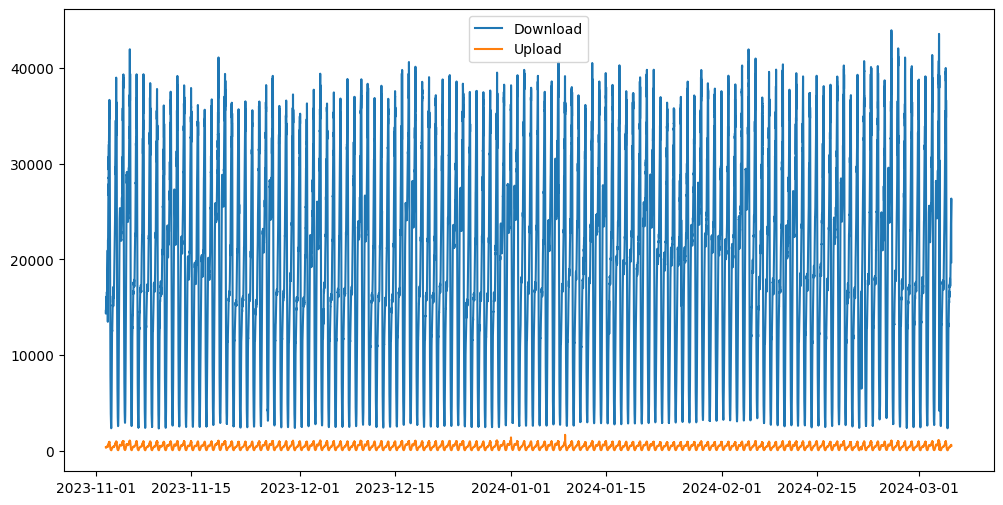

C:\Users\MONSTER\.conda\envs\guncel\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MONSTER\.conda\envs\guncel\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MONSTER\.conda\envs\guncel\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MONSTER\.conda\envs\guncel\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored

ARIMA Forecast:
Next download: 18141.80265233959
Next upload: 502.99688730332184


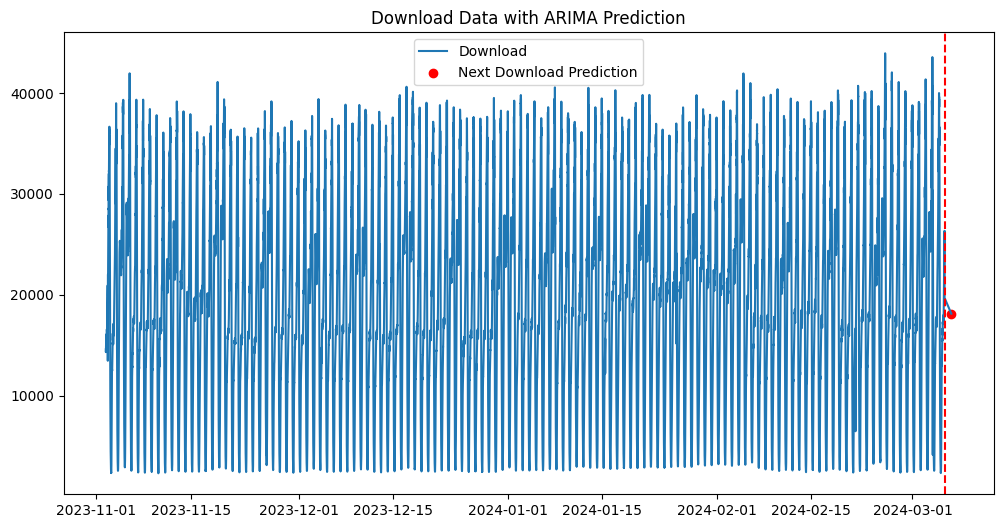

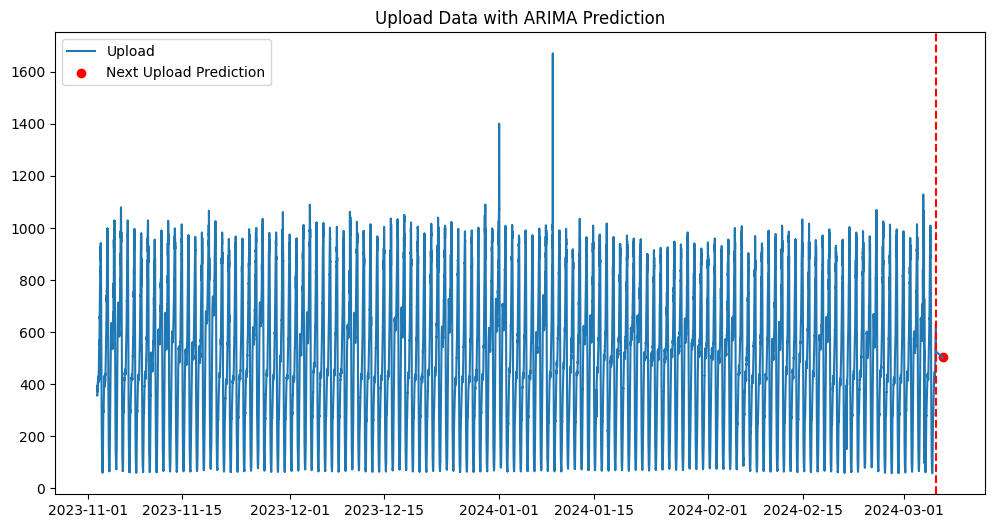

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
file_path = 'hackathon1.xlsx'
df = pd.read_excel(file_path)

# Clean the data
df_cleaned = df.dropna()
df_cleaned['TIME_STAMP'] = pd.to_datetime(df_cleaned['TIME_STAMP'])
df_cleaned = df_cleaned.set_index('TIME_STAMP')
df_cleaned = df_cleaned.sort_index(ascending=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['DOWNLOAD'], label='Download')
plt.plot(df_cleaned['UPLOAD'], label='Upload')
plt.legend()
plt.show()

# ARIMA model
def arima_model(series):
    model = ARIMA(series, order=(5, 1, 0))
    model_fit = model.fit()
    return model_fit

# Predict using ARIMA
download_arima = arima_model(df_cleaned['DOWNLOAD'])
upload_arima = arima_model(df_cleaned['UPLOAD'])

download_forecast = download_arima.forecast(steps=1).iloc[0]
upload_forecast = upload_arima.forecast(steps=1).iloc[0]

print('ARIMA Forecast:')
print('Next download:', download_forecast)
print('Next upload:', upload_forecast)

# Add the forecasts to the end of the dataframe for plotting
df_with_forecast = df_cleaned.copy()
next_timestamp = df_cleaned.index[-1] + pd.DateOffset(1)
forecast_data = pd.DataFrame([[download_forecast, upload_forecast]], 
                             index=[next_timestamp], 
                             columns=['DOWNLOAD', 'UPLOAD'])
df_with_forecast = pd.concat([df_with_forecast, forecast_data])

# Plot the Download data with ARIMA prediction
plt.figure(figsize=(12, 6))
plt.plot(df_with_forecast['DOWNLOAD'], label='Download')
plt.axvline(df_cleaned.index[-1], color='r', linestyle='--')
plt.scatter(next_timestamp, download_forecast, color='r', label='Next Download Prediction')
plt.legend()
plt.title('Download Data with ARIMA Prediction')
plt.show()

# Plot the Upload data with ARIMA prediction
plt.figure(figsize=(12, 6))
plt.plot(df_with_forecast['UPLOAD'], label='Upload')
plt.axvline(df_cleaned.index[-1], color='r', linestyle='--')
plt.scatter(next_timestamp, upload_forecast, color='r', label='Next Upload Prediction')
plt.legend()
plt.title('Upload Data with ARIMA Prediction')
plt.show()


# SORU 2 - LSTM

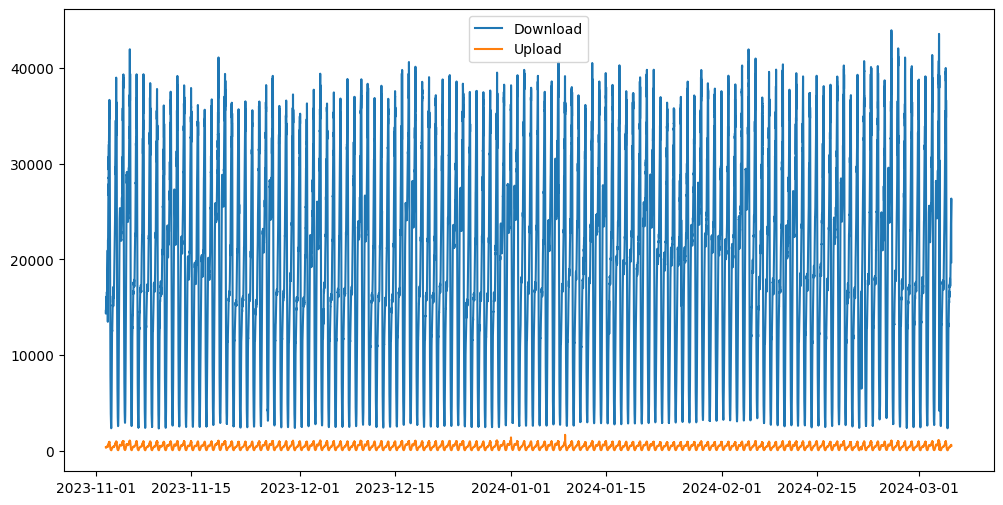

Epoch 1/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0148
Epoch 2/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.6424e-04
Epoch 3/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 4s 999us/step - loss: 1.6405e-04
Epoch 4/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.6346e-04
Epoch 5/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.6154e-04
Epoch 6/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.6454e-04
Epoch 7/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.6027e-04
Epoch 8/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.6600e-04
Epoch 9/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.7066e-04
Epoch 10/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.6642e-04
Epoch 11/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 4s 997us/step - loss: 1.6185e-04
Epoch 12/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 3s 966us/step - loss: 1.7020e-04
Epoch 13/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.6897e-04
Epoch 14/20
3543/3543 ━━━━━━━━━━━━━━━━━━━━ 4s

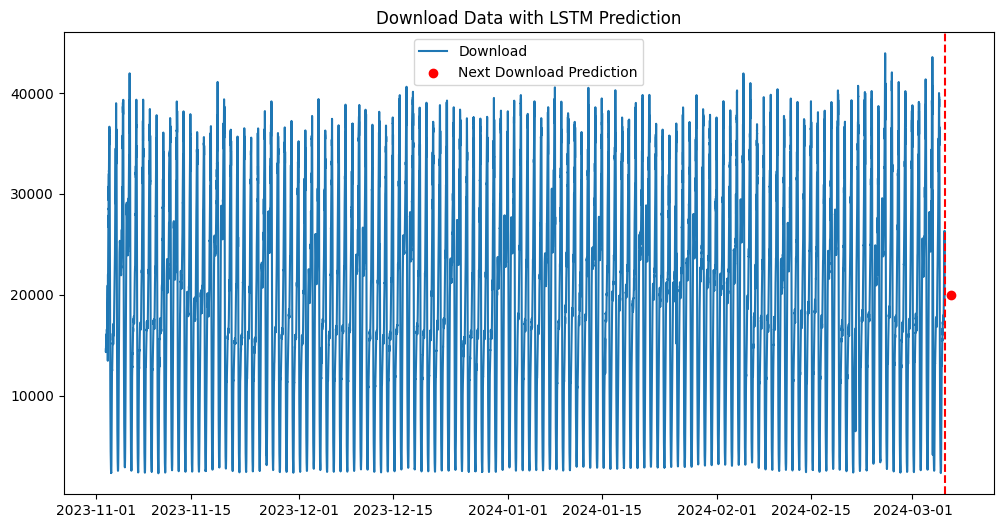

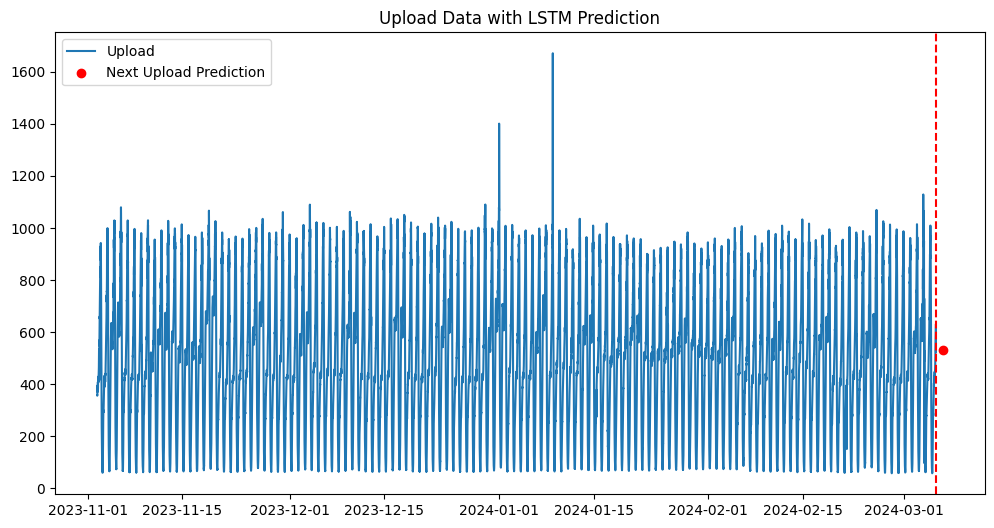

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

# Load the dataset
file_path = 'hackathon1.xlsx'
df = pd.read_excel(file_path)

# Clean the data
df = df.dropna()
df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])
df = df.set_index('TIME_STAMP')
df = df.sort_index(ascending=True)  # Ensure the data is sorted by time

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['DOWNLOAD'], label='Download')
plt.plot(df['UPLOAD'], label='Upload')
plt.legend()
plt.show()

# LSTM model
def lstm_model(series):
    series = series.values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    series = scaler.fit_transform(series)
    train_size = int(len(series) * 0.8)
    train, test = series[0:train_size, :], series[train_size:len(series), :]
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset) - look_back - 1):
            a = dataset[i:(i + look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(Input(shape=(1, look_back)))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=20, batch_size=8, verbose=1)
    return model, scaler

download_lstm, download_scaler = lstm_model(df['DOWNLOAD'])
upload_lstm, upload_scaler = lstm_model(df['UPLOAD'])

# Predict next value using LSTM
def predict_lstm(model, scaler, series):
    series = series.values.reshape(-1, 1)
    series = scaler.transform(series)
    series = np.reshape(series, (series.shape[0], 1, series.shape[1]))
    next_value = model.predict(series[-1].reshape(1, 1, 1))
    next_value = scaler.inverse_transform(next_value)
    return next_value[0][0]

next_download_lstm = predict_lstm(download_lstm, download_scaler, df['DOWNLOAD'])
next_upload_lstm = predict_lstm(upload_lstm, upload_scaler, df['UPLOAD'])

print('LSTM Forecast:')
print('Next download:', next_download_lstm)
print('Next upload:', next_upload_lstm)

# Plot the Download data with prediction
plt.figure(figsize=(12, 6))
plt.plot(df['DOWNLOAD'], label='Download')
plt.axvline(df.index[-1], color='r', linestyle='--')
plt.scatter(df.index[-1] + pd.DateOffset(1), next_download_lstm, color='r', label='Next Download Prediction')
plt.legend()
plt.title('Download Data with LSTM Prediction')
plt.show()

# Plot the Upload data with prediction
plt.figure(figsize=(12, 6))
plt.plot(df['UPLOAD'], label='Upload')
plt.axvline(df.index[-1], color='r', linestyle='--')
plt.scatter(df.index[-1] + pd.DateOffset(1), next_upload_lstm, color='r', label='Next Upload Prediction')
plt.legend()
plt.title('Upload Data with LSTM Prediction')
plt.show()
